In [ ]:
#data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.array([
    [0], [1], [2]
])

Y = (3 * X) - 5

In [ ]:
# model
X_b = np.hstack([X, np.ones((X.shape[0], 1))])

weights = np.random.randn(2,1) * 0.1

learning_rate = 0.1
max_epochs = 10000
tolerance = 1e-9

mses = []
n = X_b.shape[0]

for epoch in range(max_epochs):
    # for each update iteration (also known as an epoch):
    # 1. recompute Y hat
    # 2. compute the dragiant ising djdw = 2/n (X.T(yhat - y))
    # 3. update the weights by weights = weights - learingrate(gradiant)
    Y_hat = X_b @ weights

    error = Y_hat - Y

    mse = np.mean(error ** 2)
    mses.append(mse)

    gradiant = (2 / n) * X_b.T @ error

    weights = weights - learning_rate * gradiant

    # check convergence fro tolerance
    if epoch > 0 and abs(mses[-2] - mses[-1]) < tolerance:
        print(f"Converged during epoch {epoch}")
        break

print(f"Last MSE: {mses[-1]}")



Converged during epoch 182
Last MSE: 0.0000000078


In [ ]:
#predictions and learned weights
Y_hat = X_b @ weights

rmse = np.sqrt(np.mean((Y - Y_hat) ** 2))
print(f"RMSE: {rmse}")

smape = np.mean(np.abs(Y - Y_hat) / (np.abs(Y) + np.abs(Y_hat)))
print(f"smape: {smape}")

smape = np.mean

print(f"\nLearned weights:")
print(f"Slope: {weights[0, 0]}")
print(f"Intercept: {weights[1, 0]}")

RMSE: 8.327564196820099e-05
smape: 1.6644283838775504e-05

Learned weights:
Slope: 2.999907855524777
Intercept: -4.999872156369757


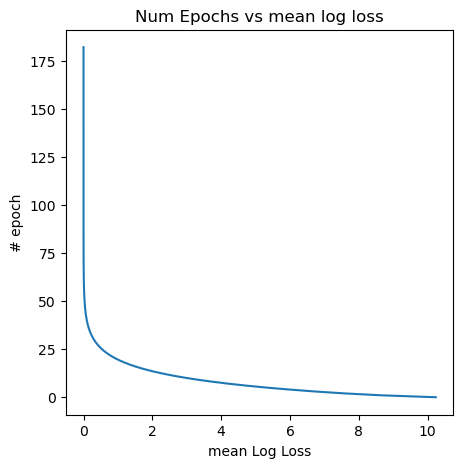

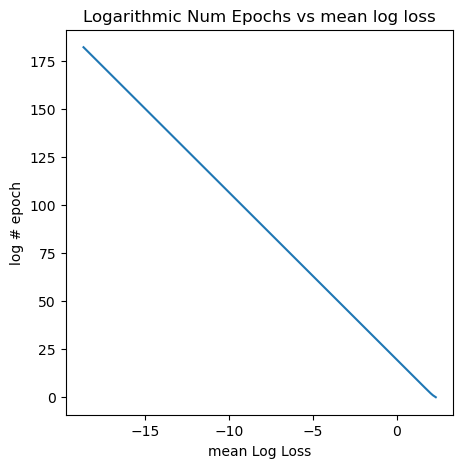

In [ ]:
#visualizations

plt.figure(figsize=(5, 5))
plt.plot(mses, range(len(mses)))
plt.xlabel('mean Log Loss')
plt.ylabel('# epoch')
plt.title('Num Epochs vs mean log loss')
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(np.log(mses), range(len(mses)))
plt.xlabel('mean Log Loss')
plt.ylabel('log # epoch')
plt.title('Logarithmic Num Epochs vs mean log loss')
plt.show()